In [1]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [2]:
unzip_data("nlp_getting_started.zip")

In [3]:
# Visualiizng the dataset
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [5]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
len(train_df), len(test_df)

(7613, 3263)

In [8]:
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
    _,text,target = row
    print(f"Target: {target}","(real disaster)" if target >0 else "(not real disaster)")
    print(f"Text :\n{text}\n")
    print("---\n")

Target: 0 (not real disaster)
Text :
ESN :  Cilla Black died of stroke after fall in Spain: Sir Cliff revealed he was due to visit her in Spain nextÛ_ http://t.co/F7a66dIiYK

---

Target: 0 (not real disaster)
Text :
Texas Seeks Comment on Rules for Changes to Windstorm Insurer http://t.co/XQIadG9H2w http://t.co/yPEElMjdZY

---

Target: 0 (not real disaster)
Text :
@ArianaGrande @justinbieber I'M SCREAMING OMG #IDOLS #22DAYS #WDYM

---

Target: 0 (not real disaster)
Text :
Woke up so blown lol

---

Target: 0 (not real disaster)
Text :
I want it to rainstorm PLEASE

---



In [9]:
#split data into training and validation data
from sklearn.model_selection import train_test_split

In [10]:
train_sen ,val_sen ,train_lab ,val_lab  = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                           train_df_shuffled["target"].to_numpy(),
                                                           test_size=0.1, random_state=42)

In [11]:
len(train_sen)

6851

In [12]:
train_sen[:10],train_lab[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [13]:
#converting text to numbers
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [14]:
text_vectorizer = TextVectorization(max_tokens=10000, 
                                    standardize="lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams=None,output_mode = "int", output_sequence_length = None, pad_to_max_tokens=True)

In [15]:
# Find the average number of tokens (words) in the training 
round(sum([len(i.split()) for i in train_sen])/(len(train_sen)))

15

In [16]:
max_vocab_length = 10000
max_length=15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                   output_mode="int",
                                   output_sequence_length=max_length)

In [17]:
#Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sen)

In [18]:
#create a sample sentence and tokenie it
sample = "There's a flood in my street and crying babies!"
text_vectorizer([sample])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 264,    3,  232,    4,   13,  698,    7, 1693, 1552,    0,    0,
           0,    0,    0,    0]], dtype=int64)>

In [19]:
random_sen = random.choice(train_sen)
print(f"Original text:  {random_sen}\n\nVetorized version: {text_vectorizer([random_sen])}")

Original text:  #YIAYplan Use my awesome collection of Amiibos to destroy all in my path.

Vetorized version: [[6559  447   13 1042 2517    6    1    5  305   44    4   13 2809    0
     0]]


In [20]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-6:]

In [21]:
top_5_words, bottom_5_words, len(words_in_vocab)

(['', '[UNK]', 'the', 'a', 'in'],
 ['pageshi', 'pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'],
 10000)

In [22]:
#Embedding
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set the input shape
                             output_dim=128, # set the size of the embedding vector
                             embeddings_initializer="uniform", # default, initialize embedding vectors randomly
                             input_length=max_length # how long is each input
                             )

embedding

In [23]:
#get a sandom sentence
random_sentences = random.choice(train_sen)
print(f"OG : {random_sentences}\n\n Embedded version {embedding(text_vectorizer([random_sentences]))}")

OG : Dr. Jim &amp; the tsunami: The latest New Yorker warned us in no uncertain terms. Haven't you heard? The tsunami's... http://t.co/1RrEO2jG9u

 Embedded version [[[ 0.04881767  0.04793863  0.01637434 ...  0.02004777  0.03505907
    0.00440798]
  [-0.02447293 -0.02630949  0.00162911 ... -0.00480982 -0.03191097
    0.03043875]
  [-0.01455431  0.0242593   0.03903102 ... -0.00949111 -0.00490928
    0.01617697]
  ...
  [ 0.01068532 -0.03768606  0.03697271 ...  0.04047365 -0.03504112
    0.0430585 ]
  [ 0.04961531 -0.03053292 -0.04348239 ...  0.00575237  0.02832905
   -0.04075187]
  [ 0.04226383 -0.01259454  0.03230125 ...  0.01480509  0.03292806
   -0.03285842]]]


In [24]:
sample_embed = embedding(text_vectorizer([random_sentences]))
sample_embed

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04881767,  0.04793863,  0.01637434, ...,  0.02004777,
          0.03505907,  0.00440798],
        [-0.02447293, -0.02630949,  0.00162911, ..., -0.00480982,
         -0.03191097,  0.03043875],
        [-0.01455431,  0.0242593 ,  0.03903102, ..., -0.00949111,
         -0.00490928,  0.01617697],
        ...,
        [ 0.01068532, -0.03768606,  0.03697271, ...,  0.04047365,
         -0.03504112,  0.0430585 ],
        [ 0.04961531, -0.03053292, -0.04348239, ...,  0.00575237,
          0.02832905, -0.04075187],
        [ 0.04226383, -0.01259454,  0.03230125, ...,  0.01480509,
          0.03292806, -0.03285842]]], dtype=float32)>

In [25]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.04881767,  0.04793863,  0.01637434,  0.00233163,  0.0483196 ,
       -0.04190755, -0.01728798, -0.02675275, -0.00283642, -0.03966668,
        0.04560318,  0.01573045, -0.04679239,  0.03216933,  0.02182932,
        0.04271669, -0.00667409, -0.03577119, -0.024893  ,  0.02645513,
        0.01577568,  0.02693948,  0.02511514, -0.02930051,  0.01229469,
       -0.02116214,  0.02452834, -0.02160116, -0.00556091,  0.0063116 ,
        0.02141949,  0.04798014,  0.04362238,  0.0412198 , -0.00420249,
       -0.01143152,  0.02885919,  0.04844349, -0.00083796,  0.0481312 ,
       -0.01093709, -0.03723902,  0.03723425, -0.04580832, -0.0313194 ,
       -0.01179204,  0.04912345, -0.0246675 ,  0.025269  ,  0.01229234,
       -0.0463359 , -0.04393802, -0.00803835,  0.03547962, -0.02532147,
        0.03524324, -0.00251601,  0.02202989, -0.04828912,  0.04747247,
        0.0312806 ,  0.04551525, -0.0458364 ,  0.03555666,  0.00970737,
       -0.005812

# MODELLING 

In [26]:
#Model 0 - baseline model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_sen, train_lab )

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
baseline_score = model_0.score(val_sen,  val_lab)
baseline_score*100

79.26509186351706

In [28]:
baseline_preds = model_0.predict(val_sen)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [29]:
train_lab[:20]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_resuts(y_true,y_pred):
    model_accuracy = accuracy_score(y_true, y_pred) *100
    model_precision, model_recall, model_fscore , _ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
    
    model_results = {"accuracy": model_accuracy,
                    "precision" : model_precision,
                    "recall": model_recall,
                     "f1" : model_fscore}
    return model_results

In [31]:
baseline_results = calculate_resuts(val_lab,baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [32]:
#MODEL 1 - Dense Model

#create a tensorboard callback
from helper_functions import create_tensorboard_callback

SAVE_DIR = "model_logs"

In [33]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.GlobalAveragePooling1D()(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs,outputs, name="model_1_dense")

In [34]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [35]:
model_1.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [36]:
model_1.fit(x=train_sen,y=train_lab,epochs=5,
           validation_data=(val_sen,val_lab),callbacks=[create_tensorboard_callback(SAVE_DIR,"model_1_Dense")])

Saving TensorBoard log files to: model_logs/model_1_Dense/20230925-121842
Epoch 1/5
215/215 [==============================] - 6s 24ms/step - loss: 0.6359 - accuracy: 0.6497 - val_loss: 0.5746 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.4719 - accuracy: 0.8206 - val_loss: 0.4809 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 6s 26ms/step - loss: 0.3442 - accuracy: 0.8724 - val_loss: 0.4539 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 4s 21ms/step - loss: 0.2606 - accuracy: 0.9078 - val_loss: 0.4617 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.1997 - accuracy: 0.9340 - val_loss: 0.4714 - val_accuracy: 0.7927


In [37]:
model_1.evaluate(val_sen,val_lab)

24/24 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7927


[0.47144508361816406, 0.7926509380340576]

In [38]:
model_1_pred_probs = model_1.predict(val_sen)
model_1_pred_probs.shape, model_1_pred_probs[0]

24/24 [==============================] - 0s 997us/step


((762, 1), array([0.50782925], dtype=float32))

In [39]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [40]:
model_1_results = calculate_resuts(val_lab,model_1_preds)
model_1_results

{'accuracy': 79.26509186351706,
 'precision': 0.7977980796415257,
 'recall': 0.7926509186351706,
 'f1': 0.7897346702572751}

In [41]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [42]:
words_in_vocab = text_vectorizer.get_vocabulary()
words_in_vocab[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [43]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [44]:
embed_weights = model_1.get_layer("embedding").get_weights()

In [45]:
embed_weights[0].shape

(10000, 128)

In [46]:
import io

# Code to save trained embeddings to file - we got this from here: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
    #print(index)
    if index == 0:
        continue  # skip 0, it's padding.
    vec = embed_weights[0][index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
out_v.close()
out_m.close()

In [47]:
words_in_vocab[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [48]:
try:
    from google.colab import files
    files.download('vectors.tsv')
    files.download('metadata.tsv')
except Exception:
    pass

In [49]:
#RNN - Recurrent Neural Network

In [50]:
#MODEL 2 LSTM - Long Short Term Memory
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
print(x.shape)
x = embedding(x)
print(x.shape)
x = layers.LSTM(units=64,return_sequences=True)(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1,activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15)
(None, 15, 128)
(None, 15, 64)
(None, 64)


In [51]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                      

In [52]:
model_2.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [53]:
model_2_history = model_2.fit(train_sen,train_lab,epochs=5,
                             validation_data=(val_sen,val_lab),callbacks = [create_tensorboard_callback(SAVE_DIR,"model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230925-121912
Epoch 1/5
215/215 [==============================] - 12s 37ms/step - loss: 0.3753 - accuracy: 0.8335 - val_loss: 0.4852 - val_accuracy: 0.7913
Epoch 2/5
215/215 [==============================] - 7s 33ms/step - loss: 0.2456 - accuracy: 0.9037 - val_loss: 0.5596 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 6s 30ms/step - loss: 0.1732 - accuracy: 0.9329 - val_loss: 0.6310 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 7s 34ms/step - loss: 0.1335 - accuracy: 0.9505 - val_loss: 0.8135 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0932 - accuracy: 0.9632 - val_loss: 0.9338 - val_accuracy: 0.7677


In [54]:
#make predictions 
model_2_pred_probs = model_2.predict(val_sen)
model_2_pred_probs[:10]*100

24/24 [==============================] - 1s 4ms/step


array([[ 0.90431756],
       [75.36061   ],
       [99.91883   ],
       [ 1.4926466 ],
       [ 0.11807807],
       [99.93789   ],
       [32.505787  ],
       [99.972305  ],
       [99.947174  ],
       [ 4.7269173 ]], dtype=float32)

In [55]:
val_lab[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [56]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_results = calculate_resuts(val_lab,model_2_preds)

In [57]:
model_2_results

{'accuracy': 76.77165354330708,
 'precision': 0.7757491097298188,
 'recall': 0.7677165354330708,
 'f1': 0.7629618593291249}

In [58]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.LSTM(units=128,return_sequences=True)(x)
#x = layers.LSTM(units=64,return_sequences=True)(x)
#x = layers.LSTM(64)(x)
#x = layers.Dense(64, activation="tanh")(x)
outputs = layers.Dense(1,activation = "sigmoid")(x)
model_2_1 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [59]:
model_2_1.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [60]:
model_2_1_history = model_2.fit(train_sen,train_lab,epochs=5,
                             validation_data=(val_sen,val_lab),callbacks = [create_tensorboard_callback(SAVE_DIR,"model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230925-121954
Epoch 1/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0715 - accuracy: 0.9696 - val_loss: 1.5049 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0594 - accuracy: 0.9740 - val_loss: 1.2725 - val_accuracy: 0.7323
Epoch 3/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0552 - accuracy: 0.9749 - val_loss: 1.3152 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0428 - accuracy: 0.9801 - val_loss: 1.5588 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0413 - accuracy: 0.9801 - val_loss: 1.4782 - val_accuracy: 0.7559


In [61]:
#MODEL 3 GRU - Gated Recurrent Unit

inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64,return_sequences=True)(x)
#x = layers.LSTM(42,return_sequences=True)(x)
#x = layers.GRU(99)(x)
#x = layers.Dense(64,activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [62]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_3 (Dense)             (None, 1)                 

In [63]:
model_3.compile(loss="binary_crossentropy",
               optimizer = "Adam",
               metrics=["accuracy"])

In [64]:
model_3_history = model_3.fit(train_sen,train_lab,epochs=5, validation_data = (val_sen,val_lab))

Epoch 1/5
215/215 [==============================] - 8s 26ms/step - loss: 0.2082 - accuracy: 0.9231 - val_loss: 0.7240 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1002 - accuracy: 0.9651 - val_loss: 0.8677 - val_accuracy: 0.7480
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0774 - accuracy: 0.9721 - val_loss: 0.8230 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0656 - accuracy: 0.9727 - val_loss: 0.9798 - val_accuracy: 0.7493
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0530 - accuracy: 0.9759 - val_loss: 1.0610 - val_accuracy: 0.7625


In [65]:
model_3_pred_prob = model_3.predict(val_sen)
model_3_pred_prob[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.00765666],
       [0.94148153],
       [0.9995377 ],
       [0.12932216],
       [0.0052508 ],
       [0.9997404 ],
       [0.8069898 ],
       [0.9999934 ],
       [0.9999619 ],
       [0.11259173]], dtype=float32)

In [66]:
model_3_pred = tf.squeeze(tf.round(model_3_pred_prob))
model_3_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [67]:
model_3_results = calculate_resuts(val_lab, model_3_pred)

In [68]:
model_3_results

{'accuracy': 76.24671916010499,
 'precision': 0.7639905060800456,
 'recall': 0.7624671916010499,
 'f1': 0.7602456873168202}

In [69]:
#MODEL4 BiDirectional
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs,name="model_4_bidirectional")

In [70]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               74496     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1354625 (5.17 MB)
Trainable par

In [71]:
model_4.compile(loss="binary_crossentropy",
               optimizer = "Adam",
               metrics=["accuracy"])

In [72]:
model_4_history = model_4.fit(train_sen,train_lab,epochs=6, validation_data=(val_sen,val_lab))

Epoch 1/6
215/215 [==============================] - 10s 29ms/step - loss: 0.1487 - accuracy: 0.9416 - val_loss: 0.9224 - val_accuracy: 0.7467
Epoch 2/6
215/215 [==============================] - 6s 27ms/step - loss: 0.0700 - accuracy: 0.9724 - val_loss: 0.9454 - val_accuracy: 0.7572
Epoch 3/6
215/215 [==============================] - 7s 32ms/step - loss: 0.0565 - accuracy: 0.9764 - val_loss: 1.2109 - val_accuracy: 0.7638
Epoch 4/6
215/215 [==============================] - 7s 32ms/step - loss: 0.0457 - accuracy: 0.9788 - val_loss: 1.3084 - val_accuracy: 0.7467
Epoch 5/6
215/215 [==============================] - 6s 29ms/step - loss: 0.0423 - accuracy: 0.9804 - val_loss: 1.2305 - val_accuracy: 0.7467
Epoch 6/6
215/215 [==============================] - 7s 32ms/step - loss: 0.0371 - accuracy: 0.9810 - val_loss: 1.4701 - val_accuracy: 0.7415


In [73]:
model_4_pred_probs = model_4.predict(val_sen)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[9.1836334e-04],
       [6.7091376e-01],
       [9.9975824e-01],
       [3.0198672e-01],
       [4.2294174e-05],
       [9.9269515e-01],
       [9.3330669e-01],
       [9.9994814e-01],
       [9.9993747e-01],
       [9.8854172e-01]], dtype=float32)

In [74]:
model_4_pred = tf.squeeze(tf.round(model_4_pred_probs))
model_4_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [75]:
model_4_results = calculate_resuts(val_lab,model_4_pred)

In [76]:
model_4_results

{'accuracy': 74.1469816272966,
 'precision': 0.740942337451368,
 'recall': 0.7414698162729659,
 'f1': 0.7408340290654664}

In [77]:
#MODEL 5 Conv1D

embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32,kernel_size=5,activation="relu",padding="valid")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [78]:
embedding_test, conv_1d_output

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.05146524, -0.06436817,  0.04515742, ..., -0.05429162,
          -0.06613829, -0.02269189],
         [-0.05599667, -0.05753854, -0.06132532, ..., -0.06756753,
          -0.00340832, -0.07080739],
         [-0.0463059 , -0.09395526, -0.05040954, ..., -0.06474779,
          -0.01121051, -0.04480051],
         ...,
         [-0.0921231 , -0.03711103, -0.07204008, ..., -0.07509153,
          -0.01798043, -0.05367536],
         [-0.0921231 , -0.03711103, -0.07204008, ..., -0.07509153,
          -0.01798043, -0.05367536],
         [-0.0921231 , -0.03711103, -0.07204008, ..., -0.07509153,
          -0.01798043, -0.05367536]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.        , 0.        , 0.03674851, 0.        , 0.03161033,
          0.05140526, 0.06704543, 0.01456885, 0.        , 0.18556711,
          0.06095782, 0.        , 0.06410731, 0.        , 0.        ,
          0.        , 0.

In [79]:
from tensorflow.keras import layers
input = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides = 1, activation="relu", padding = "valid")(x)
x = layers.GlobalMaxPool1D()(x)
#x = layers.Dense(64,activation="sigmoid")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs,outputs, name="model_5_Conv1D")

#Compilation
model_5.compile(loss="binary_crossentropy",
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])

#Summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_5 (Dense)             (None, 1)              

In [80]:
#fitting
model_5_history = model_5.fit(train_sen,train_lab,epochs=5,validation_data=(val_sen,val_lab),callbacks=[create_tensorboard_callback(SAVE_DIR,"Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230925-122142
Epoch 1/5
215/215 [==============================] - 7s 29ms/step - loss: 0.1464 - accuracy: 0.9565 - val_loss: 0.8532 - val_accuracy: 0.7507
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0682 - accuracy: 0.9761 - val_loss: 1.0337 - val_accuracy: 0.7559
Epoch 3/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0588 - accuracy: 0.9777 - val_loss: 1.0663 - val_accuracy: 0.7467
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0499 - accuracy: 0.9803 - val_loss: 1.1490 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0488 - accuracy: 0.9806 - val_loss: 1.1651 - val_accuracy: 0.7454


In [81]:
#predictions
model_5_pred_probs = model_5.predict(val_sen)

24/24 [==============================] - 0s 2ms/step


In [82]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [83]:
model_5_results = calculate_resuts(y_true = val_lab, y_pred = model_5_preds)
model_5_results

{'accuracy': 74.54068241469817,
 'precision': 0.7451859822978528,
 'recall': 0.7454068241469817,
 'f1': 0.7441236732575316}

In [84]:
from tensorflow.keras import layers
input = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=6, strides = 1, activation="relu", padding = "valid")(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64,activation="sigmoid")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_5_1 = tf.keras.Model(inputs,outputs, name="model_5_Conv1D")

#Compilation
model_5_1.compile(loss="binary_crossentropy",
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])

model_5_1_history = model_5_1.fit(train_sen,train_lab,epochs=5,validation_data=(val_sen,val_lab),callbacks=[create_tensorboard_callback(SAVE_DIR,"Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230925-122215
Epoch 1/5
215/215 [==============================] - 7s 28ms/step - loss: 0.1669 - accuracy: 0.9397 - val_loss: 0.7972 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0625 - accuracy: 0.9788 - val_loss: 0.8820 - val_accuracy: 0.7349
Epoch 3/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0517 - accuracy: 0.9815 - val_loss: 0.9296 - val_accuracy: 0.7441
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0477 - accuracy: 0.9813 - val_loss: 0.9608 - val_accuracy: 0.7375
Epoch 5/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0428 - accuracy: 0.9825 - val_loss: 0.9732 - val_accuracy: 0.7454


In [85]:
from tensorflow.keras import layers
input = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=512, kernel_size=6, strides = 2, activation="tanh")(x)
x = layers.Conv1D(filters=128, kernel_size=4, strides = 1, activation="relu", padding = "valid")(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64,activation="sigmoid")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_5_2 = tf.keras.Model(inputs,outputs, name="model_5_Conv1D")

#Compilation
model_5_2.compile(loss="binary_crossentropy",
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])

model_5_2_history = model_5_2.fit(train_sen,train_lab,epochs=5,validation_data=(val_sen,val_lab),callbacks=[create_tensorboard_callback(SAVE_DIR,"Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230925-122246
Epoch 1/5
215/215 [==============================] - 11s 48ms/step - loss: 0.0996 - accuracy: 0.9590 - val_loss: 0.9213 - val_accuracy: 0.7375
Epoch 2/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0517 - accuracy: 0.9774 - val_loss: 1.1665 - val_accuracy: 0.7415
Epoch 3/5
215/215 [==============================] - 10s 46ms/step - loss: 0.0424 - accuracy: 0.9812 - val_loss: 1.3016 - val_accuracy: 0.7375
Epoch 4/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0376 - accuracy: 0.9822 - val_loss: 1.4120 - val_accuracy: 0.7349
Epoch 5/5
215/215 [==============================] - 10s 46ms/step - loss: 0.0403 - accuracy: 0.9813 - val_loss: 1.2482 - val_accuracy: 0.7454


In [86]:
from tensorflow.keras import layers
input = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=512, kernel_size=6, strides = 2, activation="tanh")(x)
x = layers.Conv1D(filters=128, kernel_size=4, strides = 1, activation="relu", padding = "valid")(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64,activation="sigmoid")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_5_3 = tf.keras.Model(inputs,outputs, name="model_5_Conv1D")

#Compilation
model_5_3.compile(loss="binary_crossentropy",
                  optimizer = tf.keras.optimizers.Adam(lr=0.0001),
                  metrics = ["accuracy"])

model_5_3_history = model_5_3.fit(train_sen,train_lab,epochs=5,validation_data=(val_sen,val_lab),callbacks=[create_tensorboard_callback(SAVE_DIR,"Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230925-122337
Epoch 1/5
215/215 [==============================] - 11s 46ms/step - loss: 0.0808 - accuracy: 0.9670 - val_loss: 1.1208 - val_accuracy: 0.7402
Epoch 2/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0418 - accuracy: 0.9820 - val_loss: 1.2865 - val_accuracy: 0.7336
Epoch 3/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0405 - accuracy: 0.9819 - val_loss: 1.2487 - val_accuracy: 0.7388
Epoch 4/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0344 - accuracy: 0.9842 - val_loss: 1.3757 - val_accuracy: 0.7402
Epoch 5/5
215/215 [==============================] - 9s 40ms/step - loss: 0.0339 - accuracy: 0.9832 - val_loss: 1.3962 - val_accuracy: 0.7546


In [87]:
from tensorflow.keras import layers
input = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=512, kernel_size=6, strides = 1, activation="relu")(x)
#x = layers.GlobalMaxPool1D()(x)
x = layers.Conv1D(filters=64, kernel_size=4, strides = 1, activation="relu",padding="valid")(x)
#x = layers.GlobalMaxPool1D()(x)
x = layers.Conv1D(filters=64, kernel_size=4, strides = 1, activation="relu", padding = "valid")(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(128,activation="sigmoid")(x)
x = layers.Dense(32,activation="sigmoid")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_5_4 = tf.keras.Model(inputs,outputs, name="model_5_Conv1D")

#Compilation
model_5_4.compile(loss="binary_crossentropy",
                  optimizer = tf.keras.optimizers.Adam(lr=0.01),
                  metrics = ["accuracy"])

model_5_4_history = model_5_4.fit(train_sen,train_lab,epochs=5,validation_data=(val_sen,val_lab),callbacks=[create_tensorboard_callback(SAVE_DIR,"Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230925-122424
Epoch 1/5
215/215 [==============================] - 12s 52ms/step - loss: 0.1361 - accuracy: 0.9594 - val_loss: 0.8774 - val_accuracy: 0.7467
Epoch 2/5
215/215 [==============================] - 11s 49ms/step - loss: 0.0513 - accuracy: 0.9815 - val_loss: 1.0379 - val_accuracy: 0.7454
Epoch 3/5
215/215 [==============================] - 12s 54ms/step - loss: 0.0388 - accuracy: 0.9841 - val_loss: 1.1603 - val_accuracy: 0.7493
Epoch 4/5
215/215 [==============================] - 12s 58ms/step - loss: 0.0359 - accuracy: 0.9823 - val_loss: 1.2548 - val_accuracy: 0.7388
Epoch 5/5
215/215 [==============================] - 11s 52ms/step - loss: 0.0376 - accuracy: 0.9850 - val_loss: 1.2216 - val_accuracy: 0.7297


In [88]:
model_5_4.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_7 (Conv1D)           (None, 10, 512)           393728    
                                                                 
 conv1d_8 (Conv1D)           (None, 7, 64)             131136    
                                                                 
 conv1d_9 (Conv1D)           (None, 4, 64)             16448     
                                                    

In [89]:
import tensorflow_hub as hub
#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [90]:
#embed_samples = embed([sample,"When you can the universal sentence encoder on a sentence, it turns it into numbers"])
#print(embed_samples[0][:50])

In [93]:
#Model 6
#Create keras layer

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                       input_shape=[],dtype = tf.string,
                                       trainable=False,
                                       name="USE")

In [94]:
#create model
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")    
], name="model_6_USE")
model_6.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history_6 = model_6.fit(train_sen,train_lab,epochs=7,validation_data = (val_sen,val_lab))

Epoch 1/7
215/215 [==============================] - 6s 9ms/step - loss: 0.6536 - accuracy: 0.7135 - val_loss: 0.6182 - val_accuracy: 0.7651
Epoch 2/7
215/215 [==============================] - 1s 6ms/step - loss: 0.5854 - accuracy: 0.7844 - val_loss: 0.5673 - val_accuracy: 0.7795
Epoch 3/7
215/215 [==============================] - 1s 6ms/step - loss: 0.5417 - accuracy: 0.7926 - val_loss: 0.5347 - val_accuracy: 0.7808
Epoch 4/7
215/215 [==============================] - 1s 6ms/step - loss: 0.5123 - accuracy: 0.7989 - val_loss: 0.5130 - val_accuracy: 0.7861
Epoch 5/7
215/215 [==============================] - 1s 6ms/step - loss: 0.4918 - accuracy: 0.8002 - val_loss: 0.4985 - val_accuracy: 0.7887
Epoch 6/7
215/215 [==============================] - 1s 6ms/step - loss: 0.4766 - accuracy: 0.8013 - val_loss: 0.4879 - val_accuracy: 0.7900
Epoch 7/7
215/215 [==============================] - 1s 6ms/step - loss: 0.4651 - accuracy: 0.8025 - val_loss: 0.4796 - val_accuracy: 0.7940


In [95]:
#create model
model_6_1 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")    
], name="model_6_USE")
model_6_1.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history_6_1 = model_6_1.fit(train_sen,train_lab,epochs=7,validation_data = (val_sen,val_lab))

Epoch 1/7
215/215 [==============================] - 3s 9ms/step - loss: 0.4755 - accuracy: 0.7854 - val_loss: 0.4323 - val_accuracy: 0.8163
Epoch 2/7
215/215 [==============================] - 2s 7ms/step - loss: 0.3939 - accuracy: 0.8297 - val_loss: 0.4211 - val_accuracy: 0.8150
Epoch 3/7
215/215 [==============================] - 2s 7ms/step - loss: 0.3720 - accuracy: 0.8380 - val_loss: 0.4193 - val_accuracy: 0.8255
Epoch 4/7
215/215 [==============================] - 1s 7ms/step - loss: 0.3373 - accuracy: 0.8572 - val_loss: 0.4314 - val_accuracy: 0.8333
Epoch 5/7
215/215 [==============================] - 1s 6ms/step - loss: 0.3020 - accuracy: 0.8762 - val_loss: 0.4316 - val_accuracy: 0.8228
Epoch 6/7
215/215 [==============================] - 1s 7ms/step - loss: 0.2546 - accuracy: 0.8978 - val_loss: 0.4648 - val_accuracy: 0.8189
Epoch 7/7
215/215 [==============================] - 1s 7ms/step - loss: 0.2079 - accuracy: 0.9209 - val_loss: 0.4865 - val_accuracy: 0.8281


In [96]:
model_6_1.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_17 (Dense)            (None, 128)               65664     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256871809 (979.89 MB)
Trainable params: 73985 (289.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [97]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_16 (Dense)            (None, 1)                 513       
                                                                 
Total params: 256798337 (979.61 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [98]:
#create model
model_6_2 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(512,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")    
], name="model_6_USE")
model_6_2.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(lr=0.1),
               metrics=["accuracy"])
history_6_2 = model_6_2.fit(train_sen,train_lab,epochs=6,validation_data = (val_sen,val_lab))

Epoch 1/6
215/215 [==============================] - 4s 11ms/step - loss: 0.4511 - accuracy: 0.7981 - val_loss: 0.4280 - val_accuracy: 0.8136
Epoch 2/6
215/215 [==============================] - 2s 9ms/step - loss: 0.3822 - accuracy: 0.8355 - val_loss: 0.4183 - val_accuracy: 0.8241
Epoch 3/6
215/215 [==============================] - 2s 10ms/step - loss: 0.3315 - accuracy: 0.8590 - val_loss: 0.4272 - val_accuracy: 0.8255
Epoch 4/6
215/215 [==============================] - 2s 11ms/step - loss: 0.2697 - accuracy: 0.8902 - val_loss: 0.4795 - val_accuracy: 0.8110
Epoch 5/6
215/215 [==============================] - 2s 10ms/step - loss: 0.1948 - accuracy: 0.9257 - val_loss: 0.5266 - val_accuracy: 0.8018
Epoch 6/6
215/215 [==============================] - 2s 9ms/step - loss: 0.1401 - accuracy: 0.9510 - val_loss: 0.5609 - val_accuracy: 0.7940


In [99]:
model_6_pred=tf.squeeze(tf.round(model_6.predict(val_sen)))

24/24 [==============================] - 0s 6ms/step


In [100]:
model_6_results = calculate_resuts(val_lab,model_6_pred)
model_6_results

{'accuracy': 79.39632545931758,
 'precision': 0.7943173940934379,
 'recall': 0.7939632545931758,
 'f1': 0.7929702308595423}

In [101]:
#model_6_1_results = calculate_resuts(val_lab,tf.squeeze(tf.round(model_6_1.predict(val_sen))))
model_6_1.evaluate(val_sen,val_lab,)

24/24 [==============================] - 0s 6ms/step - loss: 0.4865 - accuracy: 0.8281


[0.48645371198654175, 0.8280839920043945]

In [102]:
#MODEL_7
train_10 = train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
train_10.head()

,text,target
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0
584,FedEx no longer to transport bioterror germs i...,0
7411,Gunmen kill four in El Salvador bus attack: Su...,1
5950,@camilacabello97 Internally and externally scr...,1
5541,Radiation emergency #preparedness starts with ...,1


In [103]:
train_10

,text,target
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0
584,FedEx no longer to transport bioterror germs i...,0
7411,Gunmen kill four in El Salvador bus attack: Su...,1
5950,@camilacabello97 Internally and externally scr...,1
5541,Radiation emergency #preparedness starts with ...,1
...,...,...
7593,I just heard a really loud bang and everyone i...,0
2638,That's the ultimate road to destruction,0
859,@SetZorah dad why dont you claim me that mean ...,0
578,FedEx will no longer transport bioterror patho...,0


In [104]:
train_10_text = train_10["text"].to_list()

In [105]:
train_10_text[:5]

['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
 'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
 'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
 '@camilacabello97 Internally and externally screaming',
 'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov']

In [106]:
train_10_target = train_10["target"].to_list()

In [107]:
train_10_target[:5]

[0, 0, 1, 1, 1]

In [108]:
train_10["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [109]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [110]:
#create model
model_7_1 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(512,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")    
], name="model_6_USE")
model_7_1.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(lr=0.1),
               metrics=["accuracy"])
history_7_1 = model_7_1.fit(train_10_text,train_10_target,epochs=6,validation_data = (val_sen,val_lab))

Epoch 1/6
24/24 [==============================] - 2s 33ms/step - loss: 0.6188 - accuracy: 0.7254 - val_loss: 0.4791 - val_accuracy: 0.8215
Epoch 2/6
24/24 [==============================] - 0s 16ms/step - loss: 0.4312 - accuracy: 0.8121 - val_loss: 0.3429 - val_accuracy: 0.8609
Epoch 3/6
24/24 [==============================] - 0s 16ms/step - loss: 0.3333 - accuracy: 0.8594 - val_loss: 0.2641 - val_accuracy: 0.9108
Epoch 4/6
24/24 [==============================] - 0s 16ms/step - loss: 0.2563 - accuracy: 0.9120 - val_loss: 0.1896 - val_accuracy: 0.9488
Epoch 5/6
24/24 [==============================] - 0s 15ms/step - loss: 0.1885 - accuracy: 0.9422 - val_loss: 0.1265 - val_accuracy: 0.9619
Epoch 6/6
24/24 [==============================] - 0s 15ms/step - loss: 0.1266 - accuracy: 0.9698 - val_loss: 0.0770 - val_accuracy: 0.9829


In [111]:
model_7_1_results = calculate_resuts(val_lab,tf.squeeze(tf.round(model_7_1.predict(val_sen))))

24/24 [==============================] - 0s 7ms/step


In [112]:
model_7_1_results

{'accuracy': 98.29396325459318,
 'precision': 0.9833043927634373,
 'recall': 0.9829396325459318,
 'f1': 0.9829144894206724}

In [113]:
#model7
#recreating model 6
model_7 = tf.keras.models.clone_model(model_6_1)

model_7.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

model_7.fit(train_10_text,train_10_target, epochs=5, validation_data=(val_sen,val_lab))

Epoch 1/5
24/24 [==============================] - 5s 32ms/step - loss: 0.6606 - accuracy: 0.7030 - val_loss: 0.5972 - val_accuracy: 0.8176
Epoch 2/5
24/24 [==============================] - 0s 14ms/step - loss: 0.5257 - accuracy: 0.8095 - val_loss: 0.4391 - val_accuracy: 0.8268
Epoch 3/5
24/24 [==============================] - 0s 15ms/step - loss: 0.4181 - accuracy: 0.8226 - val_loss: 0.3620 - val_accuracy: 0.8425
Epoch 4/5
24/24 [==============================] - 0s 13ms/step - loss: 0.3527 - accuracy: 0.8528 - val_loss: 0.3044 - val_accuracy: 0.8858
Epoch 5/5
24/24 [==============================] - 0s 13ms/step - loss: 0.3018 - accuracy: 0.8739 - val_loss: 0.2561 - val_accuracy: 0.9094


In [114]:
#model7
#recreating model 6
model_7_2 = tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")    
], name="model_6_USE")

model_7_2.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

history_7 = model_7_2.fit(train_10_text,train_10_target, epochs=5, validation_data=(val_sen,val_lab))

Epoch 1/5
24/24 [==============================] - 2s 35ms/step - loss: 0.6737 - accuracy: 0.6925 - val_loss: 0.6378 - val_accuracy: 0.8097
Epoch 2/5
24/24 [==============================] - 0s 13ms/step - loss: 0.6060 - accuracy: 0.8068 - val_loss: 0.5608 - val_accuracy: 0.8058
Epoch 3/5
24/24 [==============================] - 0s 13ms/step - loss: 0.5292 - accuracy: 0.8029 - val_loss: 0.4887 - val_accuracy: 0.8136
Epoch 4/5
24/24 [==============================] - 0s 13ms/step - loss: 0.4700 - accuracy: 0.8147 - val_loss: 0.4414 - val_accuracy: 0.8202
Epoch 5/5
24/24 [==============================] - 0s 12ms/step - loss: 0.4316 - accuracy: 0.8121 - val_loss: 0.4103 - val_accuracy: 0.8281


In [115]:
model_7_2_results = calculate_resuts(val_lab,tf.squeeze(tf.round(model_7_2.predict(val_sen))))

24/24 [==============================] - 0s 6ms/step


In [116]:
#model7
#recreating model 6
model_7_3 = tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(128,activation="relu"),
    #layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")    
], name="model_6_USE")

model_7_3.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

model_7_3.fit(train_10_text,train_10_target, epochs=5, validation_data=(val_sen,val_lab))

Epoch 1/5
24/24 [==============================] - 2s 30ms/step - loss: 0.6881 - accuracy: 0.5611 - val_loss: 0.6807 - val_accuracy: 0.6522
Epoch 2/5
24/24 [==============================] - 0s 13ms/step - loss: 0.6753 - accuracy: 0.7070 - val_loss: 0.6687 - val_accuracy: 0.7415
Epoch 3/5
24/24 [==============================] - 0s 12ms/step - loss: 0.6635 - accuracy: 0.7543 - val_loss: 0.6576 - val_accuracy: 0.7717
Epoch 4/5
24/24 [==============================] - 0s 13ms/step - loss: 0.6528 - accuracy: 0.7661 - val_loss: 0.6465 - val_accuracy: 0.7782
Epoch 5/5
24/24 [==============================] - 0s 12ms/step - loss: 0.6422 - accuracy: 0.7766 - val_loss: 0.6364 - val_accuracy: 0.7822


In [117]:
model_7_2_results

{'accuracy': 82.80839895013123,
 'precision': 0.8280725735647643,
 'recall': 0.8280839895013123,
 'f1': 0.8276612071450564}

In [118]:
train_sen_10 = train_sen[:int(len(train_sen)/10)]

In [119]:
len(train_sen_10)

685

In [120]:
train_lab_10 = train_lab[:int(len(train_sen)/10)]

In [121]:
len(train_lab_10)

685

In [122]:
pd.Series(train_lab_10).value_counts()

0    406
1    279
dtype: int64

In [123]:
#model8
#recreating model 7 with corrected data
model_8 = tf.keras.models.clone_model(model_7_1)

model_8.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(lr=0.01),
               metrics = ["accuracy"])

history_8 = model_8.fit(train_sen_10,train_lab_10, epochs=5, validation_data=(val_sen,val_lab))

Epoch 1/5
22/22 [==============================] - 8s 66ms/step - loss: 0.6181 - accuracy: 0.6686 - val_loss: 0.5433 - val_accuracy: 0.7861
Epoch 2/5
22/22 [==============================] - 0s 16ms/step - loss: 0.4292 - accuracy: 0.8365 - val_loss: 0.5149 - val_accuracy: 0.7795
Epoch 3/5
22/22 [==============================] - 0s 16ms/step - loss: 0.3262 - accuracy: 0.8599 - val_loss: 0.5159 - val_accuracy: 0.7703
Epoch 4/5
22/22 [==============================] - 0s 16ms/step - loss: 0.2424 - accuracy: 0.9182 - val_loss: 0.5567 - val_accuracy: 0.7533
Epoch 5/5
22/22 [==============================] - 0s 20ms/step - loss: 0.1700 - accuracy: 0.9562 - val_loss: 0.6033 - val_accuracy: 0.7546


In [125]:
model_8_results = calculate_resuts(val_lab,tf.squeeze(tf.round(model_8.predict(val_sen))))

24/24 [==============================] - 1s 7ms/step


In [126]:
#compare the models
# Combine model results into a DataFrame

all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_1_results,
                                  "8_tf_hub_use_encoder_10_percent_corrected": model_8_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,79.265092,0.797798,0.792651,0.789735
2_lstm,76.771654,0.775749,0.767717,0.762962
3_gru,76.246719,0.763991,0.762467,0.760246
4_bidirectional,74.146982,0.740942,0.741470,0.740834
5_conv1d,74.540682,0.745186,0.745407,0.744124
6_tf_hub_use_encoder,79.396325,0.794317,0.793963,0.792970
7_tf_hub_use_encoder_10_percent,98.293963,0.983304,0.982940,0.982914
8_tf_hub_use_encoder_10_percent_corrected,75.459318,0.754548,0.754593,0.753301


In [127]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

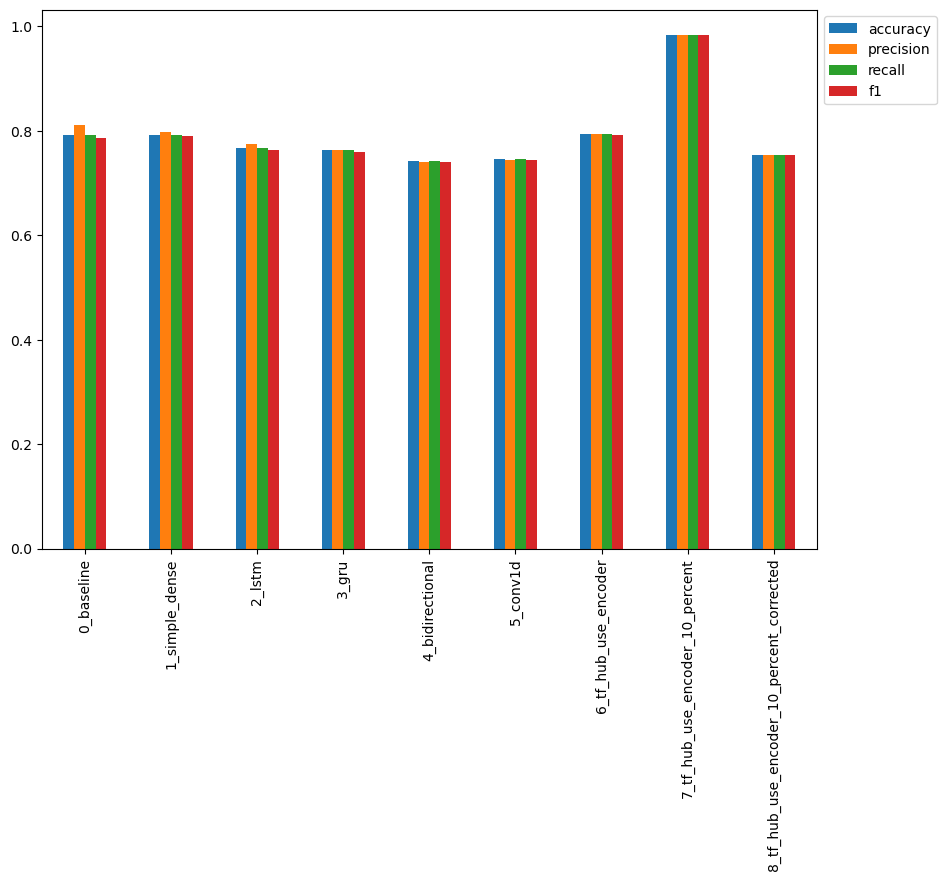

In [128]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

<Axes: >

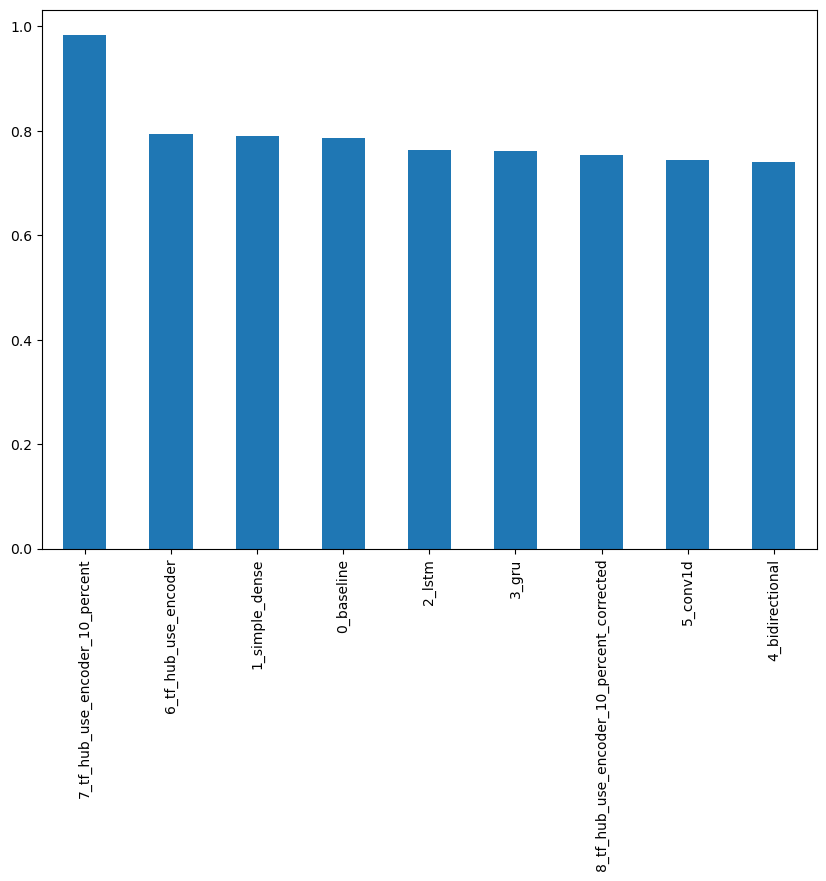

In [131]:
#sort model result by f1-score
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7))

In [132]:
model_6_2.save("model_6_2.h5")

C:\Users\rishu.nand\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [136]:
#Load model with custome hub layer
import tensorflow_hub as hub
#loaded_model_6_2 = tf.keras.models.load_model("model_6_2.h5",custom_objects={"kerasLayer":hub.KerasLayer})
loaded_model_6 = tf.keras.models.load_model("model_6_2.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [137]:
#loaded model evaluation
loaded_model_6.evaluate(val_sen,val_lab)

24/24 [==============================] - 10s 35ms/step - loss: 0.5609 - accuracy: 0.7940


[0.560909628868103, 0.7939632534980774]

In [138]:
model_6_2.evaluate(val_sen,val_lab)

24/24 [==============================] - 19s 705ms/step - loss: 0.5609 - accuracy: 0.7940


[0.560909628868103, 0.7939632534980774]

In [139]:
model_6_2.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format\assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format\assets
